<font size = "6">
    <br>
    <strong>Company Bakruptcy Predictor using Logistic Regression</strong>
    </br>
</font>

<font size = "3">
    <br>By Patrick Salsbury </br>
    <br>This self-motivated project was conducted to deepen my understanding of machine learning algorithms whiile being able to analye real-world data. Specifically, in this notebook I wrote a Logistic Regression model from scratch while using dimensionality-reduction (Principal Component Analysis) to improve it.</br>
</font>


In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

<font size = "5">
    <strong>The Data:</strong></font>
    
</font>
<br>
<a href="url">https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download</a>

</br>
<font size = "3">
    <br>The data was collected from the Taiwan Economic Journal for the years ranging from 1999 to 2009. Company Bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. It contains 96 pieces of information(including if they went bankrupt) for 6819 different companies.</br>
    <br>Since its a yes or no question if a company went bankrupt or not, we can utilize the logistic regression algorithm we just created. Therefore, in this case our output label(y) will be the "Bankrupt?" column and any of the rest of the columns will be the features(X) of our model.</br>
</font>


In [2]:
data = pd.read_csv("bankrupt_data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<font size = "5"><strong>Logistic Regression Implementation</strong></font>

<font size = "4">
    <strong>Hypothesis Function:</strong></font>

<br>
<font size = "4">
    <br>$\hat{y} = \frac{1}{1 + e^{-z}}$</br>
    <br>$z = w_{0} + w_{1}*x^{(1)} + w_{2}*x^{(2)} + ... w_{m}*x^{(m)}$</br>
</font>
</br>

<font size = "3">
    On the left we have our sigmoid function which we will use to model our data. Because of the way the sigmoid function works, we can perform binomial classification to categorize either 1 or 0 depending on the value we calculate for $z$.
</font>


In [3]:
def calculate_sigmoid(z):
    return 1.0/(1 + np.exp(-z))

<font size = "4">
    <strong>Cost Function:</strong></font>

<br>
<font size = "4">
    <br>$cost = -\frac{1}{m}\sum_{i=1}^{m}[y*log(\hat{y}) + (1 - y) * log(1-\hat{y})]$</br>
    
</font>
</br>

<font size = "3">
    Here we are unable to use a traditional mean-squared error approach because our cost function would be non-convex(multiple local-minima). Therefore, instead we consider utilizing the logistic regression cost function that is designed to handle binary outputs and calculate costs appropriately. In addition, we are able to minimize it since it is a convex function.
</font>


In [4]:
def calculate_cost(y, y_hat):
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

<font size = "4">
    <strong>Gradient Descent:</strong></font>

<br>
<font size = "4">
    <br>$w_{i+1} = w_i - \alpha*\frac{d(cost)}{dw_i}(X)$</br>
    <br>$\frac{d(cost)}{dw_0} = \hat{y} - y$</br>
    <br>$\frac{d(cost)}{dw_j} = (\hat{y} - y)*X^{T}$  for   $ j \in {1, 2, ..., m}$</br>
</font>
</br>

<font size = "3">
    We want to find the best values for $w_i$'s parameters for our hypothesis function to minimize the total cost. In order to this we run the gradient descent algorithm which should eventually converge to an absolute minimum where the cost will be the smallest.
</font>


In [5]:
def gradient_descent(X, y, y_hat):
    m = X.shape[1]
    #partial derivative formula for w_i weight
    dw = (1/m) * np.dot(y_hat - y, X)
    #partial derivative formula for our bias
    db = (1/m) * np.sum(y_hat - y)
    
    return db, dw

<font size = "3">
    In order to train our model properly, we must change the data so it represents all features as having equal importance. Therefore, we will use the z-score method of normalizing the data(standardization).
</font>

In [6]:
def standardize(X):
    #create and return a copy of the dataframe because we don't want to change the original dataset
    X_copy = X.copy()
    
    for column in X.columns:
        #X_su = (X - X_mean)/(X_std)
        X_copy[column] = (X[column] - X[column].mean())/ X[column].std()
        
    return X_copy

<font size = "4">
    <strong>Model Training Algorithm</strong></font>

In [7]:
def train_model(X, y, iterations, learning_rate, normalize = True, print_costs = False):
    n, m = X.shape 
    
    #intialize our weights array to all zeros (m x 1)
    weights = np.zeros((m, 1)) 
    #initialize our bias to zero
    bias = 0
    
    #give the user the option to normalize the data
    if normalize:
        X = standardize(X)
        
    #reshape our y data from (n x 1) to (1 x n)
    y = y.values.reshape(1, n)
    
    #keep track of the costs
    cost_history = []
    
    for i in range(iterations + 1):
        #calculate our y prediction
        z = bias + np.dot(weights.T, X.T) 
        y_hat = calculate_sigmoid(z) 
        
        #keep track of our losses
        cost = calculate_cost(y, y_hat)
        cost_history.append(cost)
        
        #give the user the option to print the costs 
        if(print_costs and i%(iterations/10) == 0):
            print('Cost after iteration', i, 'is:', cost)
        
        #perform gradient descent
        db, dw = gradient_descent(X, y, y_hat)
        
        weights -= learning_rate * dw.T
        bias -= learning_rate * db.T
        
    return weights, bias, cost_history

<font size = "4">
    <strong>Model Predicting</strong></font>

In [8]:
def predict(weights, bias, X):
    z = bias + np.dot(weights.T, X.T)
    y_hat = calculate_sigmoid(z)
    
    #if the probability is greater than 0.5 categorize as 1
    #if the probability is 0.5 or less, categorize as 0
    y_hat = np.array(y_hat > 0.5, dtype = 'int64')
    
    return y_hat

<font size = "4">
    <strong>Model Accuracy</strong></font>

In [9]:
def calculate_accuracy(weights, bias, X, y):
    y = y.values.reshape(1, X.shape[0])
    y_hat = predict(weights, bias, X)
    
    #calculate the difference between our hypothesized y and the empirical y
    accuracy = 1 - (np.sum(np.absolute(y_hat - y)) / y.shape[1])
    
    return accuracy 

<font size = "5">
    <br><strong>Testing and Comparing Our Algorithm:</strong></font></br>


<font size = "3">
    <br>Now that we wrote our own Logistic Regression lgorithm we can take a look at our dataset once again and compare it with SkLearn's built-in logistic Regression algorithm.</br>
</font>


<font size = "4">
    <strong>Data Validation</strong></font>
<font size = "3">
    <br>
    Before we even think about touching our data, first let us validate it so we can make sure it is ready for analysis.
    </br>
</font>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

<font size = "3">
    <br>
    It looks like our data consists of all numerical values. This means we don't have to do any additional one-hot encoding for any categorical features.
    </br> 
</font>

In [11]:
#check for any na values in our data
data.isna().sum().sort_values()

Bankrupt?                                 0
 Total income/Total expense               0
 Retained Earnings to Total Assets        0
 Long-term Liability to Current Assets    0
 Current Liabilities/Equity               0
                                         ..
 Regular Net Profit Growth Rate           0
 After-tax Net Profit Growth Rate         0
 Operating Profit Growth Rate             0
 Net Income Flag                          0
 Equity to Liability                      0
Length: 96, dtype: int64

<font size = "3">
    <br>
    It also looks like our data has no 'na' values so we don't have to remove any entries.
    </br>
</font>

In [12]:
#observe the characterstics of the data
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


<font size = "3">
    However, after .describe() we can actually see that the data for each column has a $min = 0$ and a $max = 1$ so we can make the naive assumption that it has already been normalized so we don't need to bother standardizing it again later during our Logistic Regression algorithm. 
</font>

<font size = "3">
    Now we can make our X and y dataset.
</font>

In [13]:
#create our X dataset by dropping the label column (Bankrupt?)
X = data.drop(columns = ['Bankrupt?']) 
#create our y dataset by only including the label column (Bankrupt?)
y = data['Bankrupt?']

X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<font size = "3">
    Lets split the dataset so we can train and test our model. We will use SkLearn's "train_test_split" function here.
</font>

In [14]:
from sklearn.model_selection import train_test_split

#here we utilize SkLearn's built-in train_test_split function 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4568, 95)
y_train: (4568,)
X_test: (2251, 95)
y_test: (2251,)


<font size = "3">
    Now we can train our model using a learning rate of 0.1 and 1000 iterations. In addition, we will print the costs so we can see how they change as the number of iterations increase.
</font>

In [15]:
num_iterations = 1000
lr = 0.1
weights, bias, costs = train_model(X_train, y_train, iterations = num_iterations, learning_rate = lr, normalize = False, print_costs = True)

Cost after iteration 0 is: 0.6931471805599454
Cost after iteration 100 is: nan
Cost after iteration 200 is: nan
Cost after iteration 300 is: nan
Cost after iteration 400 is: nan
Cost after iteration 500 is: nan
Cost after iteration 600 is: nan
Cost after iteration 700 is: nan
Cost after iteration 800 is: nan
Cost after iteration 900 is: nan
Cost after iteration 1000 is: nan


<font size = "3">
 <br>
    As we can see, we keep getting "nan" for our total cost of our iterations. This could be a result of either two things:
 </br>
<br>
    <strong>1) The data isn't normalized.</strong>
    This isn't the case in our scenario because as we saw, the data is already normalized when we examined it earlier.
</br>
<br>
    <strong>2) Our learning rate is too big.</strong>
Since we carelessly set our learning rate to be 0.1, we will obtain nan values because each iteration will overshoot in the direction towards the minimum causing oscillation or it to diverge. Especially since the dataset we are using contains 95 features, it is very sensitive to a bigger learning rate; we can demonstrate the effectiveness of a smaller learning rate using a training set containing less features later on.
</br>
</font>

<font size = 3>
<strong>Solution:</strong>
    <br>
    Exponentially decrease our learning rate value until our cost function no longer returns nan values.
    </br>
</font>


Obtained learning rate: 1.000000000000001e-19


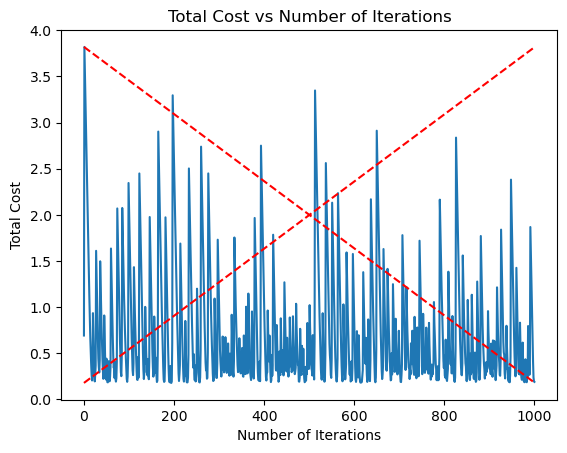

In [16]:
optimal_lr = 0.1
num_iterations = 1000

#loop until the final cost is no longer nan
while np.isnan(costs[-1]):
    #exponentially decrease our learning rate (lr = 0.1^x equivalent)
    optimal_lr *= 0.1
    weights, bias, costs = train_model(X_train, y_train, iterations = num_iterations, normalize = False, learning_rate = optimal_lr)

print('Obtained learning rate:', optimal_lr)
plt.plot(np.arange(len(costs)), costs)
plt.plot([0, len(costs)], [min(costs), max(costs)], color='red', linestyle='dashed')
plt.plot([0, len(costs)], [max(costs), min(costs)], color='red', linestyle='dashed')
plt.title('Total Cost vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Total Cost')
plt.show()

<font size = 3>
<br>
We can see that at a learning rate of $0.1^{-18}$ our cost function no longer returns nan values. However, after plotting the total costs with respect to the number of interations, we can see that our total cost continuously spikes up and down. This is unusual behavior because the total cost is theoretically supposed to decrease as the number of iterations increase.
</br>
<br>
Although this is a major indication that our model isn't optimized properly, let us proceed with comparing the accuracy score with SkLearn's Logistic Regression model before we utilize another approach.
</br>
</font>


In [17]:
from sklearn.linear_model import LogisticRegression

#intialize the SkLearn Logistic Regression Model
sk_model = LogisticRegression()
#train the model using the same training datasets 
sk_model.fit(X_train, y_train)

#calculate SkLearn's model accuracy using the testing datasets
skModel_accuracy = sk_model.score(X_test, y_test)
#calculate our model's accuracy using the testing datasets
myModel_accuracy = calculate_accuracy(weights, bias, X_test, y_test)

print('Our LR accuracy:', myModel_accuracy)
print('SkLearn\'s LR accuracy:', skModel_accuracy)

Our LR accuracy: 0.9258107507774322
SkLearn's LR accuracy: 0.9666814749000444


<font size = 3>
<strong>Comparison Results:</strong>
    <br>
    It looks like our LR model scored lower than SkLearn's LR model. However, we didn't bother optimizing it properly besides finding a learning rate that worked. Therefore, let's go ahead and compare the models again after we prepare our model for better results. We can start off by considering the number of features that we are using for our model. Currently we are trying to build our model off of the data's 95 different features which suggests that we are over-fitting the data. In addition, it's best practice to balance our model with the lowest number of features while trying to retain highest accuracy score possible. That being said, we will use Principal Component Analysis for dimensionality-reduction.
    </br>
</font>


<font size = "4">
    <strong>Principal Component Analysis</strong></font>
<font size = "3">
    <br>
    TThis is a dimensionality-reduction method that is used to reduce the the number of features that a large data set has. It does this by transforming a large set of variables into a smaller one that still contains most of the information in the larger original one. Usually the idea of using less features results in a lower accuracy but using dimensionality reduction properly allows us to barely effect our accuracy while being able to reduce the number of variables drastically.
    </br>
    <br>
    In our project we will just import SkLearn's PCA algorithm. But first, it is essential that we must standardize our dataset prior to PCA because it is very sensitive to the variances of our initial variables. So we will also import SkLearn's StandardScaler algorithm as well.
    </br>
</font>

In [18]:
from sklearn.preprocessing import StandardScaler

#here we utilize SkLearn's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(6819, 95)

<font size = "3">
    <br>
    Import SkLearn's PCA algorithm
    </br>
</font>

In [19]:
from sklearn.decomposition import PCA

#here we utilize SkLearn's PCA 
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(6819, 53)

<font size = "3">
    <br>
    We can see that our new reduced dataset only contains 53 features compared to our original 95.
    </br>
    <br>
    We can use "explained_variance_ratio_" from PCA's functions to see how the importance of each of our dataset's features is distributed.
    </br>
</font>

In [20]:
pca.explained_variance_ratio_

array([0.13346977, 0.07213753, 0.05036685, 0.04724484, 0.04234718,
       0.0322023 , 0.03049291, 0.02934268, 0.0280185 , 0.02156488,
       0.02059148, 0.01984625, 0.0178892 , 0.01600532, 0.01577908,
       0.01533237, 0.01514449, 0.01397153, 0.01314868, 0.01274245,
       0.01248121, 0.01217504, 0.01160926, 0.01119518, 0.01110326,
       0.01099148, 0.01075571, 0.01073014, 0.01071275, 0.01048095,
       0.01038181, 0.01026907, 0.01018961, 0.01013562, 0.00998788,
       0.00978913, 0.00969166, 0.0096509 , 0.00936015, 0.00908422,
       0.00900332, 0.00883054, 0.00853073, 0.00845686, 0.00804693,
       0.00762726, 0.00729723, 0.007007  , 0.00638461, 0.00605721,
       0.0057794 , 0.00573047, 0.00534135])

<font size = "3">
    <br>
    Now we can go ahead and resume the original steps in training our model using our new-transformed dataset
    </br>
    
</font>

In [21]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = 1)
print('X_train:', X_train_pca.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test_pca.shape)
print('y_test:', y_test.shape)

X_train: (4568, 53)
y_train: (4568,)
X_test: (2251, 53)
y_test: (2251,)


<font size = "3">
    Now we can train our model using a learning rate of 0.1 and 1000 iterations. In addition, we will print the costs so we can see how they change as the number of iterations increase.
</font>

In [22]:
lr = 0.1
num_iterations = 1000
weights, bias, costs = train_model(X_train_pca, y_train, iterations = num_iterations, normalize = False, learning_rate = 0.1, print_costs = True)


Cost after iteration 0 is: 0.6931471805599454
Cost after iteration 100 is: nan
Cost after iteration 200 is: nan
Cost after iteration 300 is: nan
Cost after iteration 400 is: nan
Cost after iteration 500 is: nan
Cost after iteration 600 is: nan
Cost after iteration 700 is: nan
Cost after iteration 800 is: nan
Cost after iteration 900 is: nan
Cost after iteration 1000 is: nan


<font size = "3">
    Just like before, we need to find the optimal learning rate so let's perform the same procedure as before and find a learning rate our model can use so the costs are no longer "nan".
</font>

Obtained learning rate: 0.010000000000000002


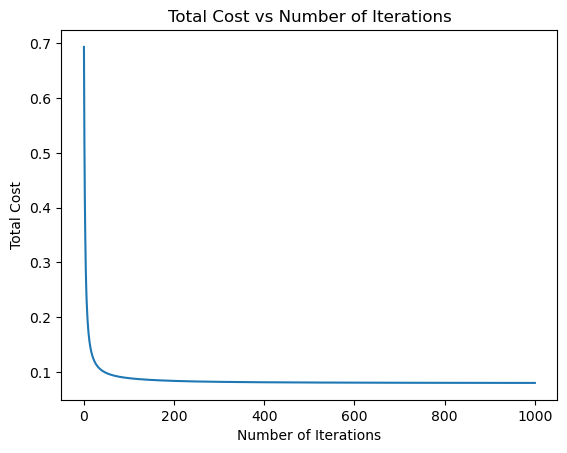

In [23]:
optimal_lr = 0.1
num_iterations = 1000

#loop until the final cost is no longer nan
while np.isnan(costs[-1]) or np.isinf(costs[-1]):
    #exponentially decrease our learning rate (lr = 0.1^x equivalent)
    optimal_lr *= 0.1
    weights, bias, costs = train_model(X_train_pca, y_train, iterations = num_iterations, normalize = False, learning_rate = optimal_lr)

print('Obtained learning rate:', optimal_lr)
plt.plot(np.arange(len(costs)), costs)
plt.title('Total Cost vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Total Cost')
plt.show()

<font size = "3">
    It looks like the learning rate we found is 0.01 and as a result, the total costs are being reduced as the number of iterations increase. This is how the graph should look compared to our previous results.
</font>

In [24]:
weights, bias, costs = train_model(X_train_pca, y_train, iterations = num_iterations, normalize = False, learning_rate = optimal_lr, print_costs = True)
myModel_accuracy = calculate_accuracy(weights, bias, X_test_pca, y_test)
print('Our LR accuracy:', myModel_accuracy)

Cost after iteration 0 is: 0.6931471805599454
Cost after iteration 100 is: 0.0889778592033684
Cost after iteration 200 is: 0.08401342908107136
Cost after iteration 300 is: 0.08230292080461481
Cost after iteration 400 is: 0.08152235729676095
Cost after iteration 500 is: 0.08108155740657243
Cost after iteration 600 is: 0.08080677236063016
Cost after iteration 700 is: 0.08062411080132295
Cost after iteration 800 is: 0.08049672097646604
Cost after iteration 900 is: 0.0804043566952928
Cost after iteration 1000 is: 0.08033513077708068
Our LR accuracy: 0.9653487338960463


<font size = "3">
    We obtained an accuracy score of 0.9653 after we performed PCA. Now let's go ahead and compare it with SkLearn's LR algorithm just like before.
</font>

In [25]:
#intialize the SkLearn Logistic Regression Model
sk_model = LogisticRegression()
#train the model using the same training datasets 
sk_model.fit(X_train_pca, y_train)

#calculate SkLearn's model accuracy using the testing datasets
skModel_accuracy = sk_model.score(X_test_pca, y_test)
#calculate our model's accuracy using the testing datasets
myModel_accuracy = calculate_accuracy(weights, bias, X_test_pca, y_test)

print('Our LR accuracy:', myModel_accuracy)
print('SkLearn\'s LR accuracy:', skModel_accuracy)

Our LR accuracy: 0.9653487338960463
SkLearn's LR accuracy: 0.9644602398933807


<font size = 3>
    It looks like in this iteration our Logistic Regression model obtained a higher accuracy score than SkLearn's model. However, this could just be a fluke so lets run a finite number of simulations while changing the training/testing datasets and plot the distributions.
</font>


SkLearn's Model Average Accuracy: 0.9658831630386496
Our Model Average Accuracy: 0.96600666370502


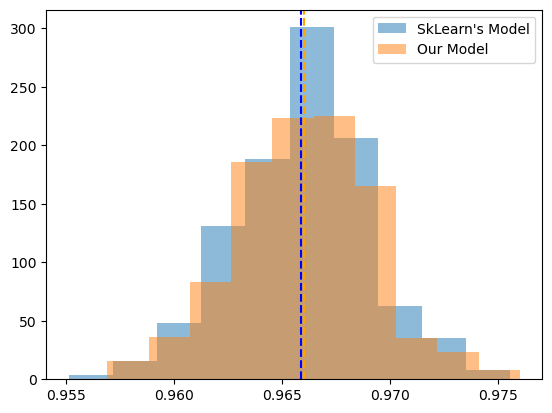

In [26]:
num_simulations = 1000

sk_accuracies = []
myModel_accuracies = []
for i in range(num_simulations):
    #we will set the random state to i so we can generate "random" datasets but get reproducibale results
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = i)
    
    #SkLearn's model
    sk_model_i = LogisticRegression().fit(X_train_pca, y_train)
    skModel_i_accuracy = sk_model_i.score(X_test_pca, y_test)
    sk_accuracies.append(skModel_i_accuracy)
    
    #our model (recall that we already have our learning_rate and num_iterations saved)
    weights, bias, costs = train_model(X_train_pca, y_train, iterations = num_iterations, normalize = False, learning_rate = optimal_lr)
    myModel_i_accuracy = calculate_accuracy(weights, bias, X_test_pca, y_test)
    myModel_accuracies.append(myModel_i_accuracy)

print('SkLearn\'s Model Average Accuracy:', np.mean(sk_accuracies))
print('Our Model Average Accuracy:', np.mean(myModel_accuracies))
plt.hist(sk_accuracies, label = 'SkLearn\'s Model', alpha = 0.5)
plt.axvline(np.array(sk_accuracies).mean(), color='blue',linestyle='dashed')
plt.hist(myModel_accuracies, label = 'Our Model', alpha = 0.5)
plt.axvline(np.array(myModel_accuracies).mean(), color='orange', linestyle='dashed')
plt.legend(loc = 'upper right')
plt.show()

<font size = 3>
<strong>Comparison Results:</strong>
    <br>
    Nice! Upon investigation of the different distribution of accuracies between our Logistic Regression Model and SkLearn's Logistic Regression Model, it appears that on average ours had a higher accuracy score out of 1000 simulations. Of course this doesn't mean our model is necessarily better, but for the sake of this project we will just consider the accuracy score as the KPI we want to measure.
    </br>
</font>
